<a href="https://colab.research.google.com/github/drwpls/cuda/blob/HW2/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Họ tên: Phan Lộc Sơn

MSSV: 19120033

# HW2: Cách thực thi song song trong CUDA

Với các GPU tương đối mới thì để biên dịch chỉ cần dùng câu lệnh: \
`nvcc tên-file.cu -o tên-file-chạy`

Nhưng trên Colab mình thường lấy được GPU khá cũ là Tesla K80 với compute capability (phiên bản phần cứng) là 3.7; để biên dịch đúng với GPU khá cũ này thì bạn cần dùng câu lệnh: \
`nvcc -arch=sm_37 tên-file.cu -o tên-file-chạy` \
Trong đó, 37 chính là compute capability của GPU Tesla K80.

Để phòng trường hợp khi làm bài bạn lấy được GPU có compute capability x.x nhưng khi chấm bài Thầy lại lấy được GPU có compute capability khác x.x, dưới đây mình sẽ có đoạn code Python để tự động lấy 2 con số ứng với compute capability của GPU và lưu vào 2 biến `major` và `minor`:


In [2]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


Một khi đã chạy đoạn code Python ở trên, để biên dịch thì bạn sẽ dùng câu lệnh: \
`nvcc -arch=sm_{major}{minor} tên-file.cu -o tên-file-chạy`

Dưới đây, khi làm bài thì bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell có chữ của Thầy là được.

Set up environments:

In [3]:
%cd /content
!rm -rf cuda
!git clone -b HW2 https://github.com/drwpls/cuda.git

/content
Cloning into 'cuda'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 87 (delta 31), reused 37 (delta 8), pack-reused 0
Unpacking objects: 100% (87/87), done.


Change working directory to HW2:

In [4]:
%cd ./cuda/HW2

/content/cuda/HW2


Verify the working directory before we start.

In [5]:
!pwd

/content/cuda/HW2


Compile HW2_P1.cu:

## Câu 1A

In [ ]:
!nvcc -arch=sm_{major}{minor} HW2_P1.cu -o HW2_P1

In [ ]:
!./HW2_P1

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.878880 ms, post-kernel time = 0.056704 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 1.960000 ms, post-kernel time = 0.054272 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 0.977536 ms, post-kernel time = 0.060000 ms
CORRECT :)


Nhận xét: Kernel time nhanh dần: kernel2 -> kernel1 -> kernel3.
Kernel2 chậm hơn Kernel1 là vì trong khi gom các threads để giảm phân kì, kernel thực hiện phép nhân và phép chia trong vòng for của hàm.
Hàm kernel3 nhanh nhất vì nó giảm được số wwarp phân kì và không có phép nhân hay chia nào trong hàm for mà chỉ có phép cộng.

## Câu 1B


In [ ]:
!./HW2_P1 1024

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 8193, block size: 1024
Kernel time = 2.594688 ms, post-kernel time = 0.033664 ms
CORRECT :)

Kernel 2
Grid size: 8193, block size: 1024
Kernel time = 2.669216 ms, post-kernel time = 0.031296 ms
CORRECT :)

Kernel 3
Grid size: 8193, block size: 1024
Kernel time = 1.266208 ms, post-kernel time = 0.030816 ms
CORRECT :)


In [ ]:
!./HW2_P1 512

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.879168 ms, post-kernel time = 0.055904 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 1.961536 ms, post-kernel time = 0.049824 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 0.984416 ms, post-kernel time = 0.049984 ms
CORRECT :)


In [ ]:
!./HW2_P1 256

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 32769, block size: 256
Kernel time = 1.538656 ms, post-kernel time = 0.091392 ms
CORRECT :)

Kernel 2
Grid size: 32769, block size: 256
Kernel time = 1.585824 ms, post-kernel time = 0.092512 ms
CORRECT :)

Kernel 3
Grid size: 32769, block size: 256
Kernel time = 0.848512 ms, post-kernel time = 0.091296 ms
CORRECT :)


In [ ]:
!./HW2_P1 128

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 65537, block size: 128
Kernel time = 1.328864 ms, post-kernel time = 0.174880 ms
CORRECT :)

Kernel 2
Grid size: 65537, block size: 128
Kernel time = 1.367072 ms, post-kernel time = 0.174624 ms
CORRECT :)

Kernel 3
Grid size: 65537, block size: 128
Kernel time = 0.734848 ms, post-kernel time = 0.173792 ms
CORRECT :)


Block size | Grid size | Num blocks / SM | Occupancy (%) | Kernel time (ms) | Post-kernel time (ms) | Total time (ms)
--- | --- | --- | --- | --- | --- | ---
1024 | 8193 | 1 | 100 | 2.594688 | 0.033664 | 2.628352
512 | 16385 | 2 | 100 | 1.879168 | 0.055904 | 1.935072
256 | 32769 | 4 | 100 | 1.538656 | 0.091392 | 1.630048
128 | 65537 | 8 | 100 | 1.328864 | 0.174880 | 1.503744

Nhận xét: Càng tăng số block/SM -> che đi độ trễ tính toán và tận dụng pipeline computing -> tăng tốc độ và giảm thời gian thực thi trong kernel time.
Tuy nhiên, nêu như vậy thì số blok càng lớn -> sau đó host phải cộng các số này lại -> mảng kết quả các block càng lớn thì host càng phải tính nhiều -> post-kernel time càng lớn.

## Câu 2

Compile binary for Problem 2

In [6]:
!nvcc -arch=sm_{major}{minor} HW2_P2.cu -o HW2_P2

Run with nStreams = 1

In [ ]:
!./HW2_P2 512 1

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 20.288832 ms

CORRECT :)


Run with nStreams = 3

In [7]:
!./HW2_P2 512 3

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 13.670400 ms

CORRECT :)


Run with nStreams = 1 and profiler

In [ ]:
!nvprof -o nstreams1.nvvp -f ./HW2_P2 512 1

n =  16777217

==1245== NVPROF is profiling process 1245, command: ./HW2_P2 512 1
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 20.311712 ms

CORRECT :)
==1245== Generated result file: /content/cuda/HW2/nstreams1.nvvp


Run with nStreams = 3 and profiler

In [ ]:
!nvprof -o nstreams3.nvvp -f ./HW2_P2 512 3

n =  16777217

==1256== NVPROF is profiling process 1256, command: ./HW2_P2 512 3
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 16.664831 ms

CORRECT :)
==1256== Generated result file: /content/cuda/HW2/nstreams3.nvvp


View from NVIDIA Visual Profiler:
nStreams = 1:
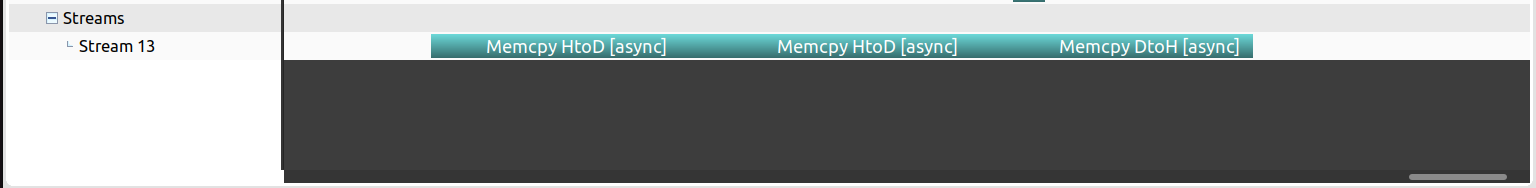
nStreams = 3:
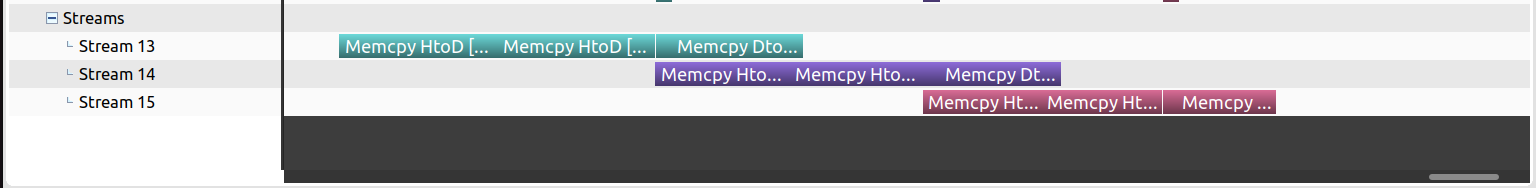